In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC


In [3]:
from google.colab import files
uploaded = files.upload()


Saving hr-analytics.csv to hr-analytics.csv


In [4]:
df = pd.read_csv('hr-analytics.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Logistic Regression
Accuracy: 0.8945578231292517
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294

[[249   6]
 [ 25  14]]

--------------------------------------------------

Decision Tree
Accuracy: 0.8469387755102041
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       255
           1       0.20      0.05      0.08        39

    accuracy                           0.85       294
   macro avg       0.53      0.51      0.50       294
weighted avg       0.78      0.85      0.81       294

[[247   8]
 [ 37   2]]

--------------------------------------------------



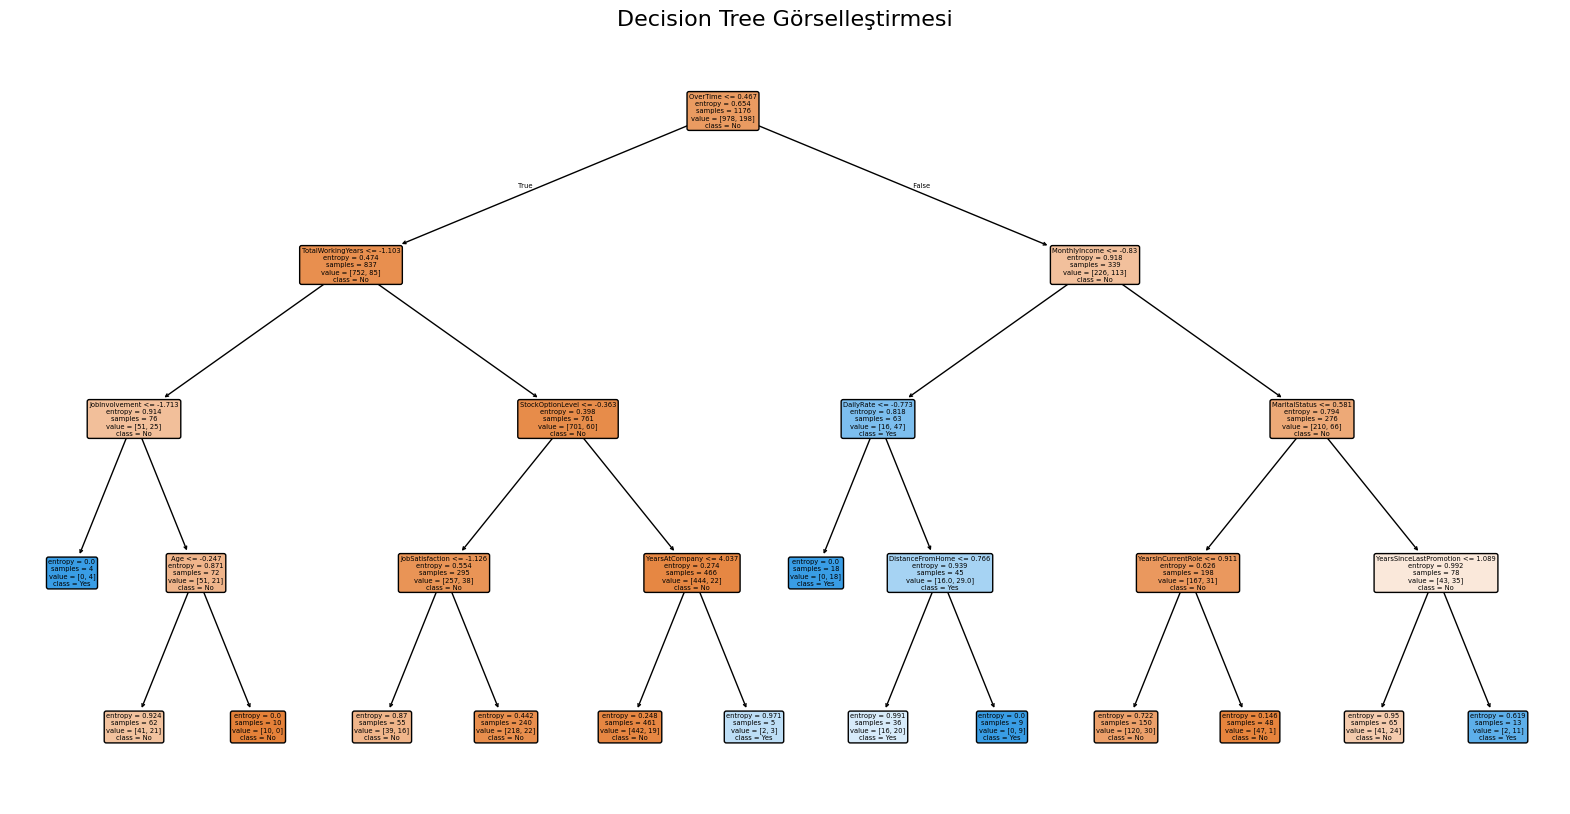

Random Forest
Accuracy: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294

[[253   2]
 [ 35   4]]

--------------------------------------------------

Naive Bayes
Accuracy: 0.8435374149659864
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       255
           1       0.43      0.59      0.50        39

    accuracy                           0.84       294
   macro avg       0.68      0.74      0.70       294
weighted avg       0.87      0.84      0.85       294

[[225  30]
 [ 16  23]]

--------------------------------------------------



In [6]:


# Modeller
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

results = {}

# Eğitim ve değerlendirme
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "-" * 50 + "\n")

    # Karar ağacı
    if name == 'Decision Tree':
        plt.figure(figsize=(20, 10))
        plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
        plt.title("Decision Tree Görselleştirmesi", fontsize=16)
        plt.show()



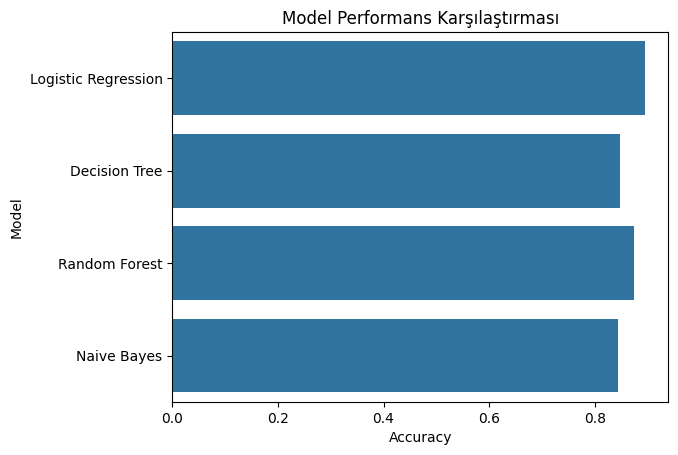

In [7]:
result_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
sns.barplot(data=result_df, x='Accuracy', y='Model')
plt.title('Model Performans Karşılaştırması')
plt.show()


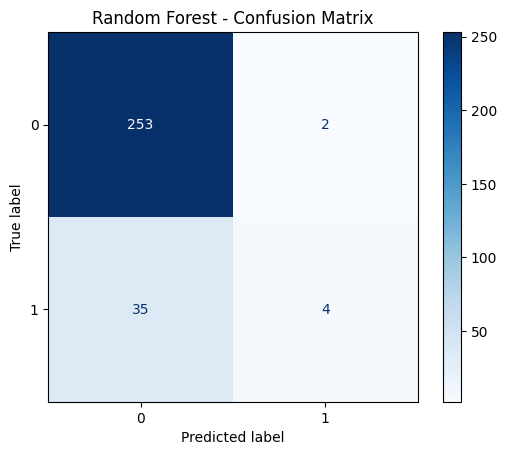

In [8]:
# Random Forest modeli
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix oluşturma ve görselleştirme
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest - Confusion Matrix")
plt.show()

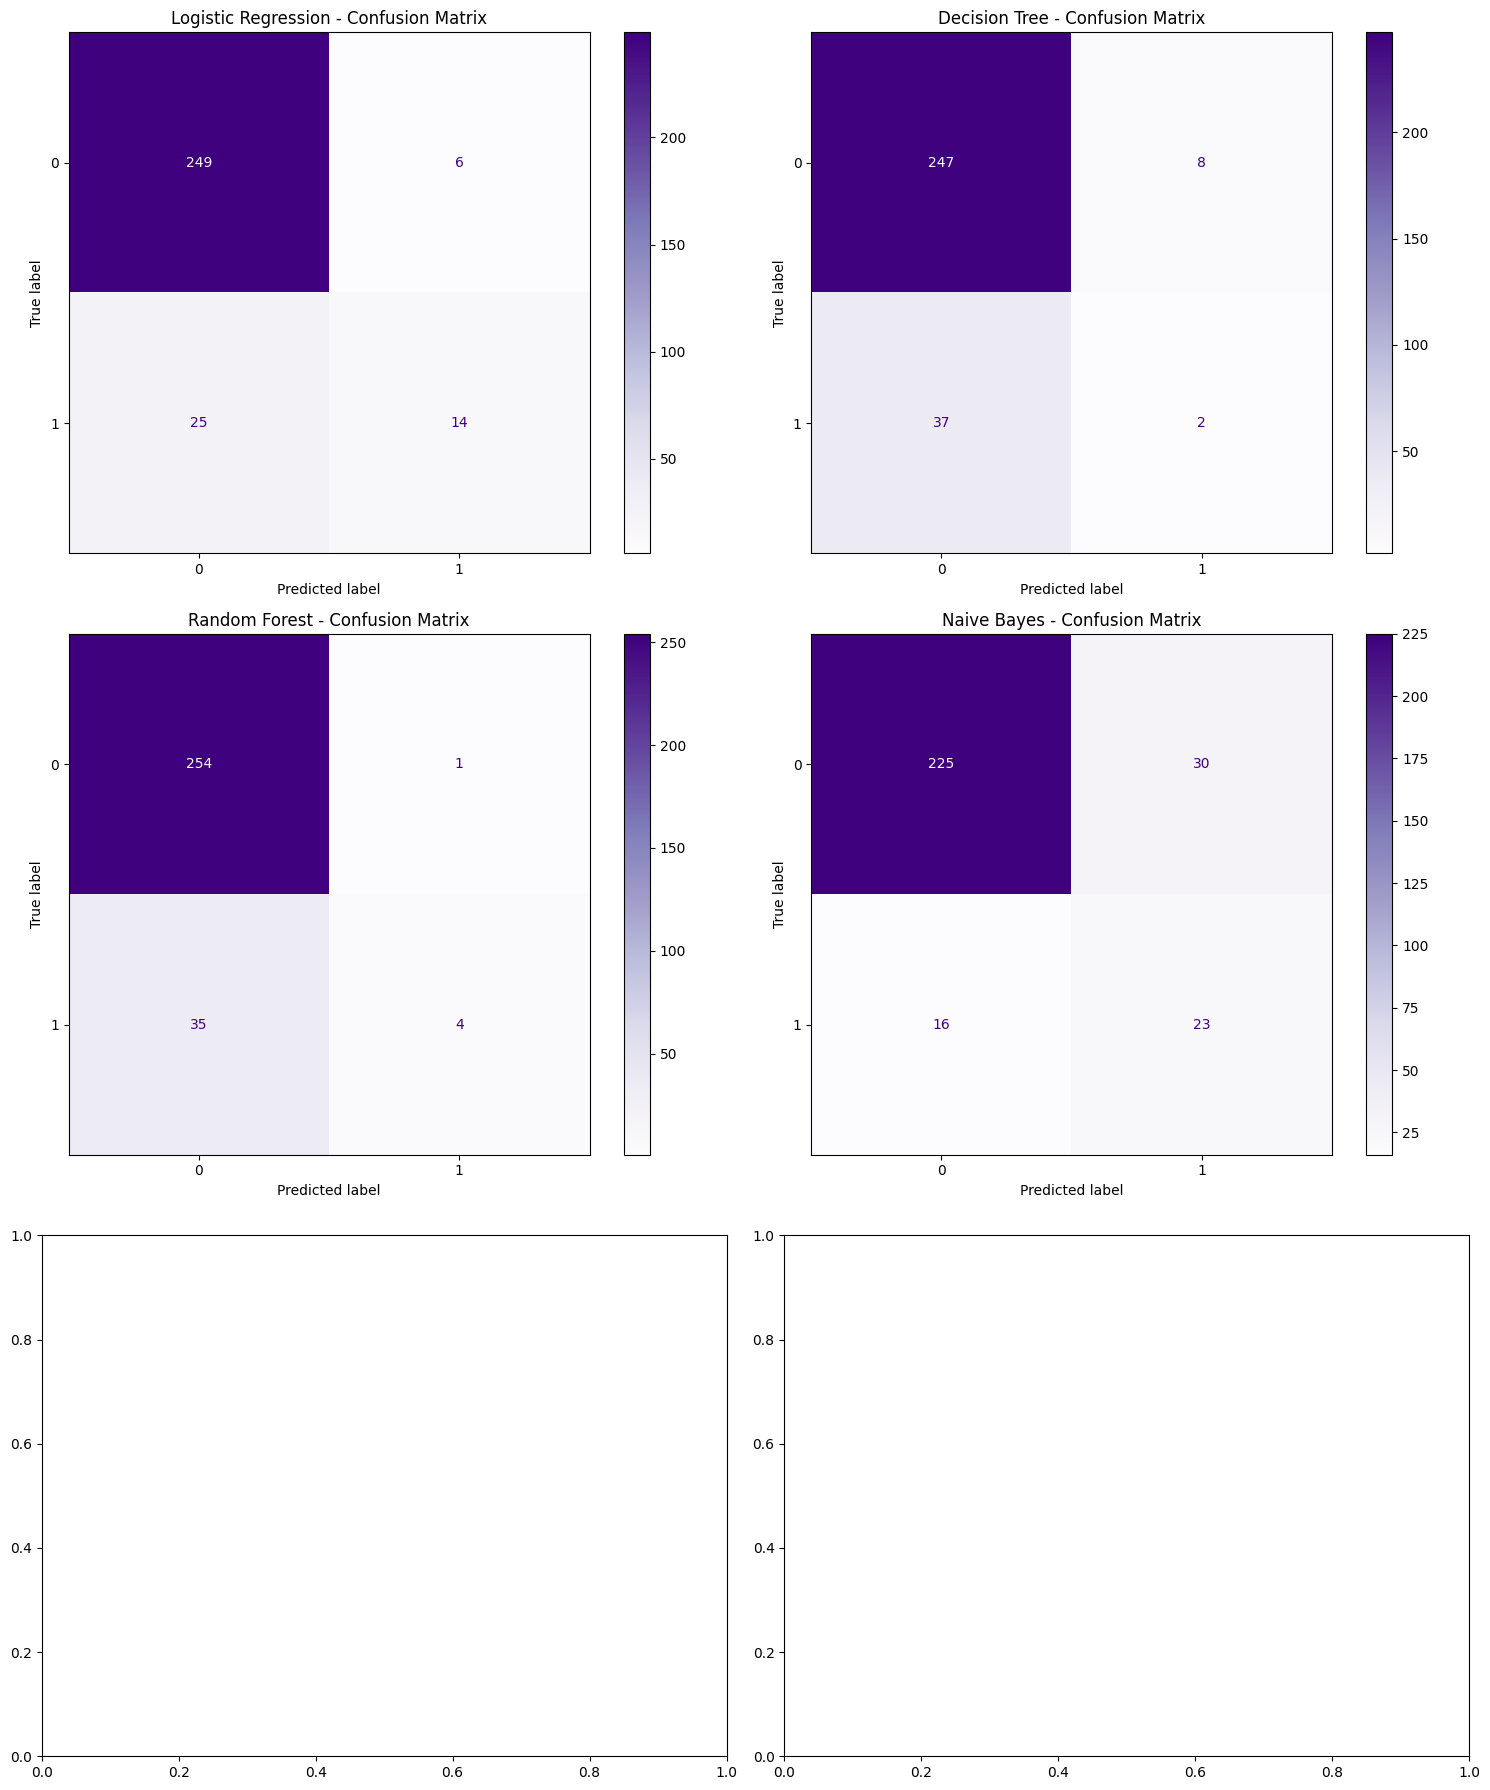

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[idx], cmap=plt.cm.Purples, values_format='d')
    axes[idx].title.set_text(name + " - Confusion Matrix")

plt.tight_layout()
plt.show()
